d #Walmart Sales Forecasing Project

 Prophet Model

In [0]:
# load fbprophet library
dbutils.library.installPyPI('FBProphet', version='0.6') # find latest version of fbprophet here: https://pypi.org/project/fbprophet/
dbutils.library.installPyPI('holidays','0.9.12') # this line is in response to this issue with fbprophet 0.5: https://github.com/facebook/prophet/issues/1293
dbutils.library.restartPython()

In [0]:
#Importing Libraries
from pyspark.sql.functions import monotonically_increasing_id, desc, row_number, col, max as max_, struct, date_format
from pyspark.sql.window import Window
from pyspark.mllib.stat import Statistics

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Main dataset
mainDF = spark.read.csv('/FileStore/tables/sales_train_evaluation.csv', header="true", inferSchema="true")
#Calendar dataset
calendarDF = spark.read.csv('/FileStore/tables/calendar.csv', header="true", inferSchema="true")
#Prices dataset
priceDF = spark.read.csv('/FileStore/tables/sell_prices.csv', header="true", inferSchema="true")

In [0]:
display(mainDF)

id item_id dept_id cat_id store_id state_id d_1 d_2 d_3 d_4 d_5 d_6 d_7 d_8 d_9 d_10 d_11 d_12 d_13 d_14 d_15 d_16 d_17 d_18 d_19 d_20 d_21 d_22 d_23 d_24 d_25 d_26 d_27 d_28 d_29 d_30 d_31 d_32 d_33 d_34 d_35 d_36 d_37 d_38 d_39 d_40 d_41 d_42 d_43 d_44 d_45 d_46 d_47 d_48 d_49 d_50 d_51 d_52 d_53 d_54 d_55 d_56 d_57 d_58 d_59 d_60 d_61 d_62 d_63 d_64 d_65 d_66 d_67 d_68 d_69 d_70 d_71 d_72 d_73 d_74 d_75 d_76 d_77 d_78 d_79 d_80 d_81 d_82 d_83 d_84 d_85 d_86 d_87 d_88 d_89 d_90 d_91 d_92 d_93 d_94 d_95 d_96 d_97 d_98 d_99 d_100 d_101 d_102 d_103 d_104 d_105 d_106 d_107 d_108 d_109 d_110 d_111 d_112 d_113 d_114 d_115 d_116 d_117 d_118 d_119 d_120 d_121 d_122 d_123 d_124 d_125 d_126 d_127 d_128 d_129 d_130 d_131 d_132 d_133 d_134 d_135 d_136 d_137 d_138 d_139 d_140 d_141 d_142 d_143 d_144 d_145 d_146 d_147 d_148 d_149 d_150 d_151 d_152 d_153 d_154 d_155 d_156 d_157 d_158 d_159 d_160 d_161 d_162 d_163 d_164 d_165 d_166 d_167 d_168 d_169 d_170 d_171 d_172 d_173 d_174 d_175 d_176 d_177 d_178 d_179 d_180 d_181 d_182 d_183 d_184 d_185 d_186 d_187 d_188 d_189 d_190 d_191 d_192 d_193 d_194 d_195 d_196 d_197 d_198 d_199 d_200 d_201 d_202 d_203 d_204 d_205 d_206 d_207 d_208 d_209 d_210 d_211 d_212 d_213 d_214 d_215 d_216 d_217 d_218 d_219 d_220 d_221 d_222 d_223 d_224 d_225 d_226 d_227 d_228 d_229 d_230 d_231 d_232 d_233 d_234 d_235 d_236 d_237 d_238 d_239 d_240 d_241 d_242 d_243 d_244 d_245 d_246 d_247 d_248 d_249 d_250 d_251 d_252 d_253 d_254 d_255 d_256 d_257 d_258 d_259 d_260 d_261 d_262 d_263 d_264 d_265 d_266 d_267 d_268 d_269 d_270 d_271 d_272 d_273 d_274 d_275 d_276 d_277 d_278 d_279 d_280 d_281 d_282 d_283 d_284 d_285 d_286 d_287 d_288 d_289 d_290 d_291 d_292 d_293 d_294 d_295 d_296 d_297 d_298 d_299 d_300 d_301 d_302 d_303 d_304 d_305 d_306 d_307 d_308 d_309 d_310 d_311 d_312 d_313 d_314 d_315 d_316 d_317 d_318 d_319 d_320 d_321 d_322 d_323 d_324 d_325 d_326 d_327 d_328 d_329 d_330 d_331 d_332 d_333 d_334 d_335 d_336 d_337 d_338 d_339 d_340 d_341 d_342 d_343 d_344 d_345 d_346 d_347 d_348 d_349 d_350 d_351 d_352 d_353 d_354 d_355 d_356 d_357 d_358 d_359 d_360 d_361 d_362 d_363 d_364 d_365 d_366 d_367 d_368 d_369 d_370 d_371 d_372 d_373 d_374 d_375 d_376 d_377 d_378 d_379 d_380 d_381 d_382 d_383 d_384 d_385 d_386 d_387 d_388 d_389 d_390 d_391 d_392 d_393 d_394 d_395 d_396 d_397 d_398 d_399 d_400 d_401 d_402 d_403 d_404 d_405 d_406 d_407 d_408 d_409 d_410 d_411 d_412 d_413 d_414 d_415 d_416 d_417 d_418 d_419 d_420 d_421 d_422 d_423 d_424 d_425 d_426 d_427 d_428 d_429 d_430 d_431 d_432 d_433 d_434 d_435 d_436 d_437 d_438 d_439 d_440 d_441 d_442 d_443 d_444 d_445 d_446 d_447 d_448 d_449 d_450 d_451 d_452 d_453 d_454 d_455 d_456 d_457 d_458 d_459 d_460 d_461 d_462 d_463 d_464 d_465 d_466 d_467 d_468 d_469 d_470 d_471 d_472 d_473 d_474 d_475 d_476 d_477 d_478 d_479 d_480 d_481 d_482 d_483 d_484 d_485 d_486 d_487 d_488 d_489 d_490 d_491 d_492 d_493 d_494 d_495 d_496 d_497 d_498 d_499 d_500 d_501 d_502 d_503 d_504 d_505 d_506 d_507 d_508 d_509 d_510 d_511 d_512 d_513 d_514 d_515 d_516 d_517 d_518 d_519 d_520 d_521 d_522 d_523 d_524 d_525 d_526 d_527 d_528 d_529 d_530 d_531 d_532 d_533 d_534 d_535 d_536 d_537 d_538 d_539 d_540 d_541 d_542 d_543 d_544 d_545 d_546 d_547 d_548 d_549 d_550 d_551 d_552 d_553 d_554 d_555 d_556 d_557 d_558 d_559 d_560 d_561 d_562 d_563 d_564 d_565 d_566 d_567 d_568 d_569 d_570 d_571 d_572 d_573 d_574 d_575 d_576 d_577 d_578 d_579 d_580 d_581 d_582 d_583 d_584 d_585 d_586 d_587 d_588 d_589 d_590 d_591 d_592 d_593 d_594 d_595 d_596 d_597 d_598 d_599 d_600 d_601 d_602 d_603 d_604 d_605 d_606 d_607 d_608 d_609 d_610 d_611 d_612 d_613 d_614 d_615 d_616 d_617 d_618 d_619 d_620 d_621 d_622 d_623 d_624 d_625 d_626 d_627 d_628 d_629 d_630 d_631 d_632 d_633 d_634 d_635 d_636 d_637 d_638 d_639 d_640 d_641 d_642 d_643 d_644 d_645 d_646 d_647 d_648 d_649 d_650 d_651 d_652 d_653 d_654 d_655 d_656 d_657 d_658 d_659 d_660 d_661 d_662 d_663 d_664 d_665 d_666 d_667 d_668 d_669 d_670 d_671 d_672 d_673 d_674 d_675 d_676 d_677 d_

d ## Preparing Datasets

In [0]:
#Grouping the dataframe by grouping by category- Foods, Household and Hobbies
sumDF= mainDF.groupBy('cat_id').sum()
#Transposing the dataframe to get the days as rows and not columns- need to covnert to Pandas DF
sumDF= sumDF.toPandas().set_index("cat_id").transpose().reset_index().rename(columns={'index': 'Day'})
#Converting back to spark dataframe
df= spark.createDataFrame(sumDF)

In [0]:
#Including date in the dataset
w1 = Window.orderBy("Day")
w2= Window.orderBy("Date")

df1 = df.select("*").withColumn("index", row_number().over(w1))
df2=  calendarDF.limit(1941).withColumn("index", row_number().over(w2))

df3= df2.select("Date", "index").join(df1, df1.index== df2.index).select("Date", "FOODS", "HOUSEHOLD", "HOBBIES")

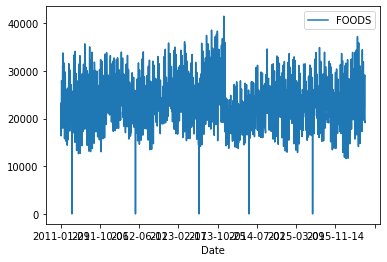

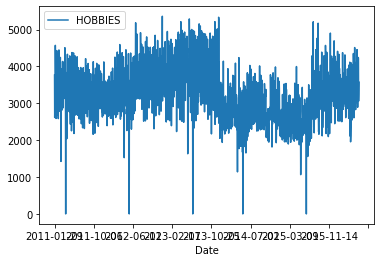

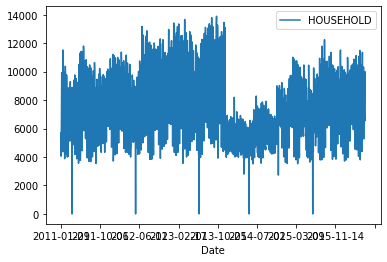

In [0]:
df3pdf = df3.toPandas()
df3pdf.plot.line(x="Date", y="FOODS")
df3pdf.plot.line(x="Date", y="HOBBIES")
df3pdf.plot.line(x="Date", y="HOUSEHOLD")

In [0]:
df3.registerTempTable("df3")

sqlContext= ("""
    SELECT 
  DATE_TRUNC('week', Date) as week,
  SUM(FOODS) as Food, SUM(HOBBIES) as Hobbies, SUM(HOUSEHOLD) as Household
FROM df3
GROUP BY DATE_TRUNC('week', Date)
ORDER BY week""")

df4 = spark.sql(sqlContext)

In [0]:
display(df4)

week Food Hobbies Household 2011-01-24T00:00:00.000+0000 42079 6379 9745 2011-01-31T00:00:00.000+0000 154778 24699 52054 2011-02-07T00:00:00.000+0000 171474 24782 55103 2011-02-14T00:00:00.000+0000 182506 24112 53930 2011-02-21T00:00:00.000+0000 162711 24319 49150 2011-02-28T00:00:00.000+0000 141877 23561 46883 2011-03-07T00:00:00.000+0000 140159 22120 49702 2011-03-14T00:00:00.000+0000 165703 24994 48583 2011-03-21T00:00:00.000+0000 169129 23493 45555 2011-03-28T00:00:00.000+0000 172557 25307 49839 2011-04-04T00:00:00.000+0000 139138 21679 41817 2011-04-11T00:00:00.000+0000 154774 22544 50064 2011-04-18T00:00:00.000+0000 181417 24887 49821 2011-04-25T00:00:00.000+0000 176966 23907 48646 2011-05-02T00:00:00.000+0000 170206 23615 50777 2011-05-09T00:00:00.000+0000 145899 21949 45674 2011-05-16T00:00:00.000+0000 125722 20343 38325 2011-05-23T00:00:00.000+0000 178115 24185 53121 2011-05-30T00:00:00.000+0000 175390 22257 57086 2011-06-06T00:00:00.000+0000 163782 22353 61953 2011-06-13T00:00:00.000+0000 150050 22214 56499 2011-06-20T00:00:00.000+0000 165167 24007 60566 2011-06-27T00:00:00.000+0000 183978 22405 58069 2011-07-04T00:00:00.000+0000 174164 23081 56141 2011-07-11T00:00:00.000+0000 154159 21599 52298 2011-07-18T00:00:00.000+0000 158687 21920 54193 2011-07-25T00:00:00.000+0000 161810 21579 52958 2011-08-01T00:00:00.000+0000 175033 20680 50663 2011-08-08T00:00:00.000+0000 190061 22096 58554 2011-08-15T00:00:00.000+0000 159746 22152 48868 2011-08-22T00:00:00.000+0000 166583 21558 55218 2011-08-29T00:00:00.000+0000 176074 23273 55343 2011-09-05T00:00:00.000+0000 168110 22029 46173 2011-09-12T00:00:00.000+0000 174570 22490 53065 2011-09-19T00:00:00.000+0000 151531 21626 47463 2011-09-26T00:00:00.000+0000 144039 21090 50010 2011-10-03T00:00:00.000+0000 188348 24003 58278 2011-10-10T00:00:00.000+0000 174867 21204 48754 2011-10-17T00:00:00.000+0000 183075 22689 53844 2011-10-24T00:00:00.000+0000 156290 21886 51845 2011-10-31T00:00:00.000+0000 167690 23016 55251 2011-11-07T00:00:00.000+0000 202134 22859 58197 2011-11-14T00:00:00.000+0000 189190 22244 54246 2011-11-21T00:00:00.000+0000 171105 22605 57110 2011-11-28T00:00:00.000+0000 164105 21151 55422 2011-12-05T00:00:00.000+0000 179186 23830 59179 2011-12-12T00:00:00.000+0000 177623 21070 53391 2011-12-19T00:00:00.000+0000 186974 22088 58749 2011-12-26T00:00:00.000+0000 157347 19592 50163 2012-01-02T00:00:00.000+0000 173292 21199 60292 2012-01-09T00:00:00.000+0000 176150 22443 60952 2012-01-16T00:00:00.000+0000 179008 21204 53736 2012-01-23T00:00:00.000+0000 186325 21116 58112 2012-01-30T00:00:00.000+0000 161658 21948 55281 2012-02-06T00:00:00.000+0000 159304 21592 53856 2012-02-13T00:00:00.000+0000 180688 23191 63831 2012-02-20T00:00:00.000+0000 172706 21882 53861 2012-02-27T00:00:00.000+0000 173620 23824 56613 2012-03-05T00:00:00.000+0000 147265 22398 50367 2012-03-12T00:00:00.000+0000 148546 24060 49840 2012-03-19T00:00:00.000+0000 174219 24169 59354 2012-03-26T00:00:00.000+0000 173359 22687 53187 2012-04-02T00:00:00.000+0000 160900 23420 49560 2012-04-09T00:00:00.000+0000 157221 23831 54623 2012-04-16T00:00:00.000+0000 141305 20152 45062 2012-04-23T00:00:00.000+0000 169126 25822 57352 2012-04-30T00:00:00.000+0000 157089 22819 46249 2012-05-07T00:00:00.000+0000 155167 22652 46709 2012-05-14T00:00:00.000+0000 139770 21479 46804 2012-05-21T00:00:00.000+0000 137407 21044 49607 2012-05-28T00:00:00.000+0000 167463 22137 49113 2012-06-04T00:00:00.000+0000 176213 21728 51442 2012-06-11T00:00:00.000+0000 160320 22750 54951 2012-06-18T00:00:00.000+0000 148889 23416 51762 2012-06-25T00:00:00.000+0000 162377 24921 60563 2012-07-02T00:00:00.000+0000 179422 26333 62291 2012-07-09T00:00:00.000+0000 183405 26007 62050 2012-07-16T00:00:00.000+0000 144971 24291 57605 2012-07-23T00:00:00.000+0000 139890 24346 60509 2012-07-30T00:00:00.000+0000 169284 26488 63883 2012-08-06T00:00:00.000+0000 167057 25338 59196 2012-08-13T00:00:00.000+0000 164384 24946 61689 2012-08-20T00:00:00.000+0000 151189 247

## EDA

In [0]:
#EDA
df4.select('Food').describe().show()
df4.select('Hobbies').describe().show()
df4.select('Household').describe().show()

+-------+------------------+
summary| Food|
+-------+------------------+
 count| 278|
 mean|165188.58633093524|
 stddev| 19729.63382269724|
 min| 42079|
 max| 216656|
+-------+------------------+

+-------+-----------------+
summary| Hobbies|
+-------+-----------------+
 count| 278|
 mean|22448.40287769784|
 stddev|3485.383485252331|
 min| 6379|
 max| 30040|
+-------+-----------------+

+-------+------------------+
summary| Household|
+-------+------------------+
 count| 278|
 mean| 53108.23741007194|
 stddev|10095.705745125968|
 min| 9745|
 max| 74960|
+-------+------------------+

In [0]:
# select variables to check correlation
df_features = df4.select("Food", "Hobbies", "Household") 
# create RDD table for correlation calculation
rdd_table = df_features.rdd.map(lambda row: row[0:])
# get the correlation matrix
corr_mat=Statistics.corr(rdd_table, method="pearson")
print(corr_mat)

[[1. 0.51498784 0.68994138]
 [0.51498784 1. 0.77947754]
 [0.68994138 0.77947754 1. ]]

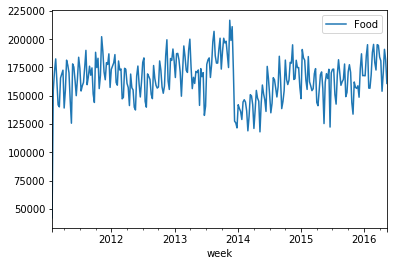

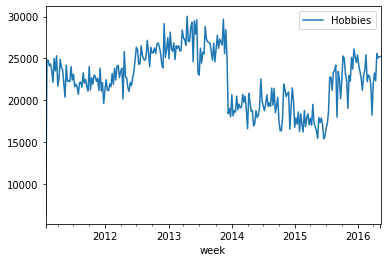

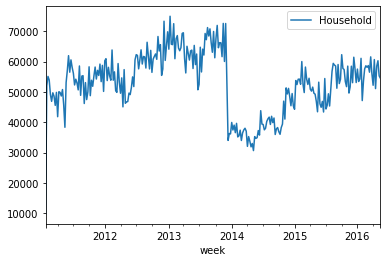

In [0]:
pdf = df4.toPandas()
pdf.plot.line(x="week", y="Food")
pdf.plot.line(x="week", y="Hobbies")
pdf.plot.line(x="week", y="Household")

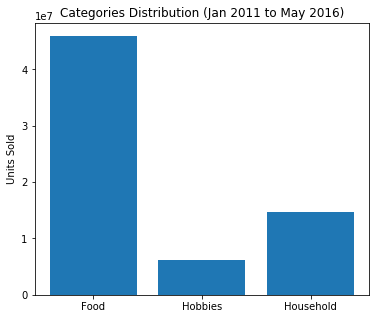

In [0]:
total= list(pdf.sum(axis=0))
x= ["Food", "Hobbies", "Household"]

plt.figure(figsize= (6,5))
plt.bar(x, total)
plt.title("Categories Distribution (Jan 2011 to May 2016)")
plt.ylabel("Units Sold")

In [0]:
#Christmas day has the lowest or even 0 sale- probably because the store is closed
calendarDF.filter(calendarDF.d == "d_331").show()
calendarDF.filter(calendarDF.d == "d_697").show()
calendarDF.filter(calendarDF.d == "d_1062").show()
calendarDF.filter(calendarDF.d == "d_1427").show()
calendarDF.filter(calendarDF.d == "d_1792").show()

+----------+--------+-------+----+-----+----+-----+------------+------------+------------+------------+-------+-------+-------+
 date|wm_yr_wk|weekday|wday|month|year| d|event_name_1|event_type_1|event_name_2|event_type_2|snap_CA|snap_TX|snap_WI|
+----------+--------+-------+----+-----+----+-----+------------+------------+------------+------------+-------+-------+-------+
2011-12-25| 11148| Sunday| 2| 12|2011|d_331| Christmas| National| null| null| 0| 0| 0|
+----------+--------+-------+----+-----+----+-----+------------+------------+------------+------------+-------+-------+-------+

+----------+--------+-------+----+-----+----+-----+------------+------------+------------+------------+-------+-------+-------+
 date|wm_yr_wk|weekday|wday|month|year| d|event_name_1|event_type_1|event_name_2|event_type_2|snap_CA|snap_TX|snap_WI|
+----------+--------+-------+----+-----+----+-----+------------+------------+------------+------------+-------+-------+-------+
2012-12-25| 11248|Tuesday| 4| 12|2012|d_697| Christmas| National| null| null| 0| 0| 0|
+----------+--------+-------+----+-----+----+-----+------------+------------+------------+------------+-------+-------+-------+

+----------+--------+---------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+
 date|wm_yr_wk| weekday|wday|month|year| d|event_name_1|event_type_1|event_name_2|event_type_2|snap_CA|snap_TX|snap_WI|
+----------+--------+---------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+
2013-12-25| 11348|Wednesday| 5| 12|2013|d_1062| Christmas| National| null| null| 0| 0| 0|
+----------+--------+---------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+

+----------+--------+--------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+
 date|wm_yr_wk| weekday|wday|month|year| d|event_name_1|event_type_1|event_name_2|event_type_2|snap_CA|snap_TX|snap_WI|
+----------+--------+--------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+
2014-12-25| 11447|Thursday| 6| 12|2014|d_1427| Christmas| National| null| null| 0| 0| 0|
+----------+--------+--------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+

+----------+--------+-------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+
 date|wm_yr_wk|weekday|wday|month|year| d|event_name_1|event_type_1|event_name_2|event_type_2|snap_CA|snap_TX|snap_WI|
+----------+--------+-------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+
2015-12-25| 11547| Friday| 7| 12|2015|d_1792| Christmas| National| null| null| 0| 0| 0|
+----------+--------+-------+----+-----+----+------+------------+------------+------------+------------+-------+-------+-------+

In [0]:
# make the dataframe queriable as a temporary view
df3.createOrReplaceTempView('df3')

In [0]:
%sql

SELECT 
  TRUNC(Date, 'MM') as month,
  SUM(FOODS) as Food
FROM df3
GROUP BY TRUNC(date, 'MM')
ORDER BY month;

month Food 2011-01-01 58462 2011-02-01 677033 2011-03-01 701648 2011-04-01 694418 2011-05-01 708364 2011-06-01 686716 2011-07-01 735756 2011-08-01 764860 2011-09-01 698334 2011-10-01 767738 2011-11-01 771679 2011-12-01 778894 2012-01-01 776822 2012-02-01 713411 2012-03-01 716033 2012-04-01 670249 2012-05-01 676654 2012-06-01 684595 2012-07-01 726841 2012-08-01 696105 2012-09-01 705827 2012-10-01 735298 2012-11-01 738766 2012-12-01 788635 2013-01-01 796366 2013-02-01 690805 2013-03-01 794327 2013-04-01 750610 2013-05-01 720732 2013-06-01 687009 2013-07-01 755691 2013-08-01 827121 2013-09-01 813679 2013-10-01 835260 2013-11-01 838956 2013-12-01 704033 2014-01-01 589719 2014-02-01 570750 2014-03-01 610103 2014-04-01 597497 2014-05-01 635350 2014-06-01 649439 2014-07-01 673411 2014-08-01 694151 2014-09-01 678621 2014-10-01 737760 2014-11-01 757887 2014-12-01 761866 2015-01-01 774854 2015-02-01 661046 2015-03-01 708773 2015-04-01 665837 2015-05-01 686304 2015-06-01 680599 2015-07-01 726965 2015-08-01 728623 2015-09-01 711700 2015-10-01 723480 2015-11-01 655347 2015-12-01 738320 2016-01-01 787259 2016-02-01 694776 2016-03-01 811945 2016-04-01 771547 2016-05-01 550771

In [0]:
%sql

SELECT 
  TRUNC(Date, 'MM') as month,
  SUM(HOBBIES) as Hobbies 
FROM df3
GROUP BY TRUNC(date, 'MM')
ORDER BY month;

month Hobbies 2011-01-01 9259 2011-02-01 98318 2011-03-01 105827 2011-04-01 99878 2011-05-01 101513 2011-06-01 96046 2011-07-01 97449 2011-08-01 97335 2011-09-01 93668 2011-10-01 99345 2011-11-01 95273 2011-12-01 96863 2012-01-01 94072 2012-02-01 92761 2012-03-01 104867 2012-04-01 99530 2012-05-01 98867 2012-06-01 97402 2012-07-01 113629 2012-08-01 109463 2012-09-01 110946 2012-10-01 115616 2012-11-01 108990 2012-12-01 116409 2013-01-01 117332 2013-02-01 105127 2013-03-01 117494 2013-04-01 119839 2013-05-01 120328 2013-06-01 118063 2013-07-01 110645 2013-08-01 119720 2013-09-01 113434 2013-10-01 114378 2013-11-01 117757 2013-12-01 101259 2014-01-01 82216 2014-02-01 77003 2014-03-01 88740 2014-04-01 80765 2014-05-01 81129 2014-06-01 82437 2014-07-01 87932 2014-08-01 87378 2014-09-01 84361 2014-10-01 77515 2014-11-01 89539 2014-12-01 87233 2015-01-01 77380 2015-02-01 68894 2015-03-01 78595 2015-04-01 76241 2015-05-01 74573 2015-06-01 72086 2015-07-01 80948 2015-08-01 98990 2015-09-01 95518 2015-10-01 102563 2015-11-01 94107 2015-12-01 110038 2016-01-01 106027 2016-02-01 95922 2016-03-01 96223 2016-04-01 99282 2016-05-01 78319

In [0]:
%sql

SELECT 
  TRUNC(Date, 'MM') as month,
  SUM(HOUSEHOLD) as Household 
FROM df3
GROUP BY TRUNC(date, 'MM')
ORDER BY month;

month Household 2011-01-01 14170 2011-02-01 212689 2011-03-01 215436 2011-04-01 202091 2011-05-01 216916 2011-06-01 245703 2011-07-01 241547 2011-08-01 236991 2011-09-01 213680 2011-10-01 235308 2011-11-01 237593 2011-12-01 248738 2012-01-01 254026 2012-02-01 237677 2012-03-01 239375 2012-04-01 217910 2012-05-01 217506 2012-06-01 225986 2012-07-01 274996 2012-08-01 260740 2012-09-01 268758 2012-10-01 269366 2012-11-01 265286 2012-12-01 285887 2013-01-01 301895 2013-02-01 271924 2013-03-01 288747 2013-04-01 273748 2013-05-01 268883 2013-06-01 255010 2013-07-01 264296 2013-08-01 298596 2013-09-01 294907 2013-10-01 287699 2013-11-01 282997 2013-12-01 217156 2014-01-01 166606 2014-02-01 146731 2014-03-01 162117 2014-04-01 146582 2014-05-01 148911 2014-06-01 160521 2014-07-01 173592 2014-08-01 179808 2014-09-01 167086 2014-10-01 166457 2014-11-01 198837 2014-12-01 213443 2015-01-01 224879 2015-02-01 216518 2015-03-01 236552 2015-04-01 223940 2015-05-01 212631 2015-06-01 197312 2015-07-01 212934 2015-08-01 240077 2015-09-01 245185 2015-10-01 249925 2015-11-01 229115 2015-12-01 250161 2016-01-01 249687 2016-02-01 224018 2016-03-01 254648 2016-04-01 247111 2016-05-01 174473

## Model Preparation and Implementation

In [0]:
#Creating training and testing dataset (60-20-20)
rowsTotal= df4.count()
rowsTraining= 255
rowsTest= 23

#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

In [0]:
from fbprophet import Prophet
import logging
# disable informational messages from fbprophet
logging.getLogger('py4j').setLevel(logging.ERROR)

#creating a function for smape since there is no built in function in Spark- works with numpy arrays
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

Importing plotly failed. Interactive plots will not work.

### Foods Category Prediction

Predict from week 256 to 278

In [0]:
foods_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (255,278):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Food as y
  FROM trainDF
  '''
  # # assemble dataset in Pandas dataframe
  train_pd_food = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  model_food = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
  model_food.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_food.fit(train_pd_food)
  
  future_pd_food = model_food.make_future_dataframe(periods= 1, freq='w', include_history=False)
  # predict over the dataset
  forecast_pd_food = model_food.predict(future_pd_food)

  # Adding all the predictions to the empty list
  foods_prediction.append(forecast_pd_food['yhat'])

#Calculation of RMSE and sMAPE over the test data
rowsTraining= 255
rowsTest= 23
#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_food = testDF.select("Food").toPandas()

# calculate evaluation metrics
mse_food = mean_squared_error(actuals_pd_food, foods_prediction)
rmse_food = sqrt(mse_food)
smape_food= smape(np.array(actuals_pd_food),np.array(foods_prediction))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True 

In [0]:
# print metrics to the screen
print("Foods \n1 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_food, smape_food))

Foods 
1 Week Time Horizon Results
RMSE: 18432.255555097992
sMAPE: 8.796830893510068

In [0]:
foods_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (254,277):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Food as y
  FROM trainDF
  '''
  # # assemble dataset in Pandas dataframe
  train_pd_food = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  model_food = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
  model_food.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_food.fit(train_pd_food)
  
  future_pd_food = model_food.make_future_dataframe(periods= 1, freq='2w', include_history=False)
  # predict over the dataset
  forecast_pd_food = model_food.predict(future_pd_food)

  # Adding all the predictions to the empty list
  foods_prediction.append(forecast_pd_food['yhat'])

#Calculation of RMSE and sMAPE over the test data
rowsTraining= 255
rowsTest= 23
#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_food = testDF.select("Food").toPandas()

# calculate evaluation metrics
mse_food = mean_squared_error(actuals_pd_food, foods_prediction)
rmse_food = sqrt(mse_food)
smape_food= smape(np.array(actuals_pd_food),np.array(foods_prediction))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True 

In [0]:
# print metrics to the screen
print("Foods \n2 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_food, smape_food))

Foods 
2 Week Time Horizon Results
RMSE: 17874.17984135819
sMAPE: 8.35726801107141

In [0]:
foods_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (252,275):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Food as y
  FROM trainDF
  '''
  # # assemble dataset in Pandas dataframe
  train_pd_food = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  model_food = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
  model_food.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_food.fit(train_pd_food)
  
  future_pd_food = model_food.make_future_dataframe(periods= 1, freq='4w', include_history=False)
  # predict over the dataset
  forecast_pd_food = model_food.predict(future_pd_food)

  # Adding all the predictions to the empty list
  foods_prediction.append(forecast_pd_food['yhat'])

#Calculation of RMSE and sMAPE over the test data
rowsTraining= 255
rowsTest= 23
#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_food = testDF.select("Food").toPandas()

# calculate evaluation metrics
mse_food = mean_squared_error(actuals_pd_food, foods_prediction)
rmse_food = sqrt(mse_food)
smape_food= smape(np.array(actuals_pd_food),np.array(foods_prediction))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True 

In [0]:
# print metrics to the screen
print("Foods\n4 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_food, smape_food))

Foods
4 Week Time Horizon Results
RMSE: 17225.57907620774
sMAPE: 8.136553685522363

In [0]:
# make the dataframe queriable as a temporary view
trainDF.createOrReplaceTempView('trainDF')

# query to aggregate data to date (ds) level
sql_statement = '''
  SELECT
    week as ds,
    Food as y
  FROM trainDF
  '''

# assemble dataset in Pandas dataframe
train_pd_food = spark.sql(sql_statement).toPandas()

# make the dataframe queriable as a temporary view
testDF.createOrReplaceTempView('testDF')

# query to aggregate data to date (ds) level
sql_statement = '''
   SELECT
     week as ds,
     Food as y
   FROM testDF
   '''

# assemble dataset in Pandas dataframe
test_pd_food = spark.sql(sql_statement).toPandas()

# set model parameters
model_food = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
model_food.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
# fit the model to historical data
model_food.fit(train_pd_food)

# define a dataset including both historical dates & 90-days beyond the last available date
future_pd_food = model_food.make_future_dataframe(periods= 23, freq='w', include_history=True)

# predict over the dataset
forecast_pd_food = model_food.predict(future_pd_food)

# get historical actuals & predictions for comparison
actuals_pd_food = test_pd_food['y']
predicted_pd_food = forecast_pd_food[ forecast_pd_food['ds'] > pd.Timestamp('2015, 12, 10').floor('D')]['yhat']

# calculate evaluation metrics
mse_food = mean_squared_error(actuals_pd_food, predicted_pd_food)
rmse_food = sqrt(mse_food)
smape_food= smape(np.array(actuals_pd_food),np.array(predicted_pd_food))

# print metrics to the screen
print("\n23 Week Prediction Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_food, smape_food))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.

23 Week Prediction Results
RMSE: 24803.207026326727
sMAPE: 12.351337934126196

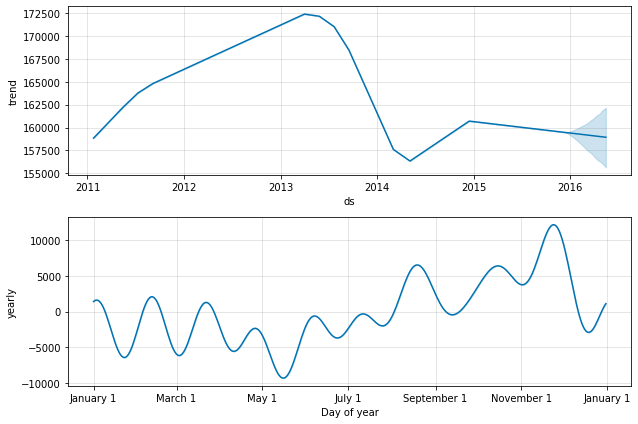

In [0]:
model_food.plot_components(forecast_pd_food)

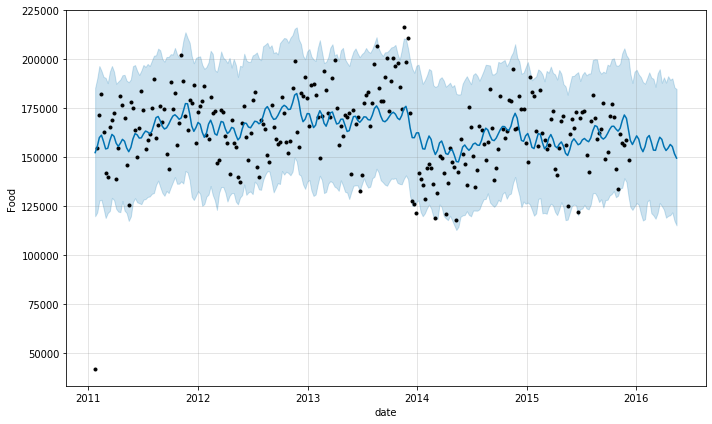

In [0]:
predict_fig= model_food.plot(forecast_pd_food, xlabel='date', ylabel='Food')

display(predict_fig)

In [0]:
display(testDF.select("week", "Food"))

week Food 2015-12-14T00:00:00.000+0000 173811 2015-12-21T00:00:00.000+0000 187017 2015-12-28T00:00:00.000+0000 167673 2016-01-04T00:00:00.000+0000 167883 2016-01-11T00:00:00.000+0000 167544 2016-01-18T00:00:00.000+0000 185545 2016-01-25T00:00:00.000+0000 195079 2016-02-01T00:00:00.000+0000 156722 2016-02-08T00:00:00.000+0000 156620 2016-02-15T00:00:00.000+0000 168296 2016-02-22T00:00:00.000+0000 188181 2016-02-29T00:00:00.000+0000 195334 2016-03-07T00:00:00.000+0000 179207 2016-03-14T00:00:00.000+0000 172700 2016-03-21T00:00:00.000+0000 195110 2016-03-28T00:00:00.000+0000 194497 2016-04-04T00:00:00.000+0000 184172 2016-04-11T00:00:00.000+0000 180784 2016-04-18T00:00:00.000+0000 153949 2016-04-25T00:00:00.000+0000 169963 2016-05-02T00:00:00.000+0000 190969 2016-05-09T00:00:00.000+0000 181673 2016-05-16T00:00:00.000+0000 160862

### Hobbies Category Prediction

In [0]:
hobbies_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (255,278):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Hobbies as y
  FROM trainDF
  '''

  # # assemble dataset in Pandas dataframe
  train_pd_hobbies = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  model_hobbies = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
  model_hobbies.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_hobbies.fit(train_pd_hobbies)
  
  future_pd_hobbies = model_hobbies.make_future_dataframe(periods= 1, freq='w', include_history=False)

  # predict over the dataset
  forecast_pd_hobbies = model_hobbies.predict(future_pd_hobbies)

  # get historical actuals & predictions for comparison
  hobbies_prediction.append(forecast_pd_hobbies['yhat'])

#Calculation of RMSE and sMAPE over the test data  
rowsTraining= 255
rowsTest= 23

#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_hobbies = testDF.select("Hobbies").toPandas()

# calculate evaluation metrics
mse_hobbies = mean_squared_error(actuals_pd_hobbies, hobbies_prediction)
rmse_hobbies = sqrt(mse_hobbies)
smape_hobbies= smape(np.array(actuals_pd_hobbies),np.array(hobbies_prediction))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True 

In [0]:
# print metrics to the screen
print("Hobbies\n1 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_hobbies, smape_hobbies))

Hobbies
1 Week Time Horizon Results
RMSE: 2449.29094023748
sMAPE: 8.523092012461047

In [0]:
hobbies_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (254,277):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Hobbies as y
  FROM trainDF
  '''

  # # assemble dataset in Pandas dataframe
  train_pd_hobbies = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  model_hobbies = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
  model_hobbies.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_hobbies.fit(train_pd_hobbies)
  
  future_pd_hobbies = model_hobbies.make_future_dataframe(periods= 1, freq='2w', include_history=False)

  # predict over the dataset
  forecast_pd_hobbies = model_hobbies.predict(future_pd_hobbies)

  # get historical actuals & predictions for comparison
  hobbies_prediction.append(forecast_pd_hobbies['yhat'])

#Calculation of RMSE and sMAPE over the test data  
rowsTraining= 255
rowsTest= 23

#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_hobbies = testDF.select("Hobbies").toPandas()

# calculate evaluation metrics
mse_hobbies = mean_squared_error(actuals_pd_hobbies, hobbies_prediction)
rmse_hobbies = sqrt(mse_hobbies)
smape_hobbies= smape(np.array(actuals_pd_hobbies),np.array(hobbies_prediction))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True 

In [0]:
# print metrics to the screen
print("Hobbies\n2 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_hobbies, smape_hobbies))

Hobbies
2 Week Time Horizon Results
RMSE: 2446.305659554681
sMAPE: 8.287925081636605

In [0]:
hobbies_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (252,275):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Hobbies as y
  FROM trainDF
  '''

  # # assemble dataset in Pandas dataframe
  train_pd_hobbies = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  model_hobbies = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
  model_hobbies.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_hobbies.fit(train_pd_hobbies)
  
  future_pd_hobbies = model_hobbies.make_future_dataframe(periods= 1, freq='4w', include_history=False)

  # predict over the dataset
  forecast_pd_hobbies = model_hobbies.predict(future_pd_hobbies)

  # get historical actuals & predictions for comparison
  hobbies_prediction.append(forecast_pd_hobbies['yhat'])

#Calculation of RMSE and sMAPE over the test data  
rowsTraining= 255
rowsTest= 23

#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_hobbies = testDF.select("Hobbies").toPandas()

# calculate evaluation metrics
mse_hobbies = mean_squared_error(actuals_pd_hobbies, hobbies_prediction)
rmse_hobbies = sqrt(mse_hobbies)
smape_hobbies= smape(np.array(actuals_pd_hobbies),np.array(hobbies_prediction))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True 

In [0]:
# print metrics to the screen
print("Hobbies\n4 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_hobbies, smape_hobbies))

Hobbies
4 Week Time Horizon Results
RMSE: 2492.9681267022083
sMAPE: 9.122585370337157

In [0]:
# make the dataframe queriable as a temporary view
trainDF.createOrReplaceTempView('trainDF')

# query to aggregate data to date (ds) level
sql_statement = '''
  SELECT
    week as ds,
    Hobbies as y
  FROM trainDF
  '''

# # assemble dataset in Pandas dataframe
train_pd_hobbies = spark.sql(sql_statement).toPandas()

# # make the dataframe queriable as a temporary view
testDF.createOrReplaceTempView('testDF')

# query to aggregate data to date (ds) level
sql_statement = '''
   SELECT
     week as ds,
     Hobbies as y
   FROM testDF
   '''

# assemble dataset in Pandas dataframe
test_pd_hobbies = spark.sql(sql_statement).toPandas()

 # set model parameters
model_hobbies = Prophet(interval_width= 0.95, changepoint_prior_scale=0.2, seasonality_prior_scale=0.01, yearly_seasonality= True)
model_hobbies.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')

# fit the model to historical data
model_hobbies.fit(train_pd_hobbies)

# define a dataset including both historical dates & 90-days beyond the last available date
future_pd_hobbies = model_hobbies.make_future_dataframe(periods= 23, freq='w', include_history=True)

# predict over the dataset
forecast_pd_hobbies = model_hobbies.predict(future_pd_hobbies)

# get historical actuals & predictions for comparison
actuals_pd_hobbies = test_pd_hobbies['y']
predicted_pd_hobbies = forecast_pd_hobbies[ forecast_pd_hobbies['ds'] > pd.Timestamp('2015, 12, 10').floor('D')]['yhat']

# calculate evaluation metrics
mse_hobbies = mean_squared_error(actuals_pd_hobbies, predicted_pd_hobbies)
rmse_hobbies = sqrt(mse_hobbies)
smape_hobbies= smape(np.array(actuals_pd_hobbies),np.array(predicted_pd_hobbies))

# print metrics to the screen
print("\n23 Week Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_hobbies, smape_hobbies))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.

23 Week Results
RMSE: 2927.253748216832
sMAPE: 11.069282630251564

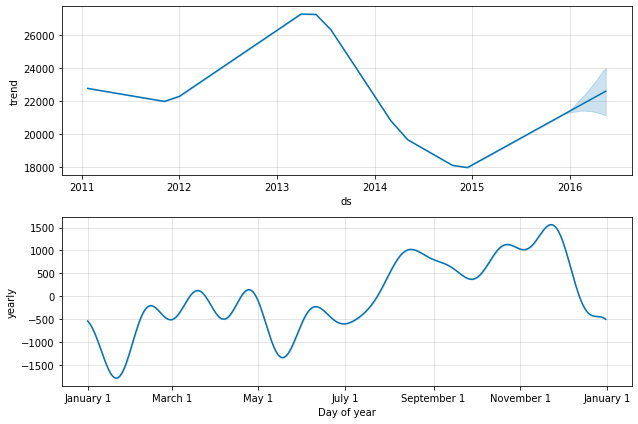

In [0]:
model_hobbies.plot_components(forecast_pd_hobbies)

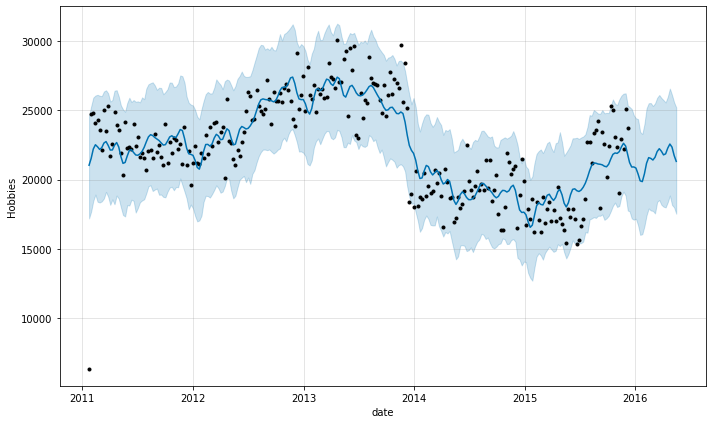

In [0]:
predict_fig= model_hobbies.plot(forecast_pd_hobbies, xlabel='date', ylabel='Hobbies')
display(predict_fig)

In [0]:
display(testDF.select("week", "Hobbies"))

week Hobbies 2015-12-14T00:00:00.000+0000 26128 2015-12-21T00:00:00.000+0000 25223 2015-12-28T00:00:00.000+0000 24491 2016-01-04T00:00:00.000+0000 25406 2016-01-11T00:00:00.000+0000 24194 2016-01-18T00:00:00.000+0000 23435 2016-01-25T00:00:00.000+0000 22640 2016-02-01T00:00:00.000+0000 21167 2016-02-08T00:00:00.000+0000 22939 2016-02-15T00:00:00.000+0000 23595 2016-02-22T00:00:00.000+0000 25425 2016-02-29T00:00:00.000+0000 22207 2016-03-07T00:00:00.000+0000 23007 2016-03-14T00:00:00.000+0000 22790 2016-03-21T00:00:00.000+0000 21866 2016-03-28T00:00:00.000+0000 18208 2016-04-04T00:00:00.000+0000 21926 2016-04-11T00:00:00.000+0000 23251 2016-04-18T00:00:00.000+0000 22308 2016-04-25T00:00:00.000+0000 25566 2016-05-02T00:00:00.000+0000 25060 2016-05-09T00:00:00.000+0000 25203 2016-05-16T00:00:00.000+0000 25228

### Household Category Prediction

In [0]:
household_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (255,278):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Household as y
  FROM trainDF
  '''
  
  # assemble dataset in Pandas dataframe
  train_pd_household = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  # set model parameters
  model_household = Prophet(interval_width= 0.95, changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)
  model_household.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_household.fit(train_pd_household)
  
  future_pd_household = model_household.make_future_dataframe(periods= 1, freq='w', include_history=False)
  # predict over the dataset
  forecast_pd_household = model_household.predict(future_pd_household)

  # get historical actuals & predictions for comparison
  household_prediction.append(forecast_pd_household['yhat'])

#Calculation of RMSE and sMAPE over the test data  
rowsTraining= 255
rowsTest= 23

#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_household = testDF.select("Household").toPandas()

# calculate evaluation metrics
mse_household = mean_squared_error(actuals_pd_household, household_prediction)
rmse_household = sqrt(mse_household)
smape_household = smape(np.array(actuals_pd_household),np.array(household_prediction))

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disab

In [0]:
# print metrics to the screen
print("Household\n1 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_household, smape_household))

Household
1 Week Time Horizon Results
RMSE: 3665.4734972207366
sMAPE: 5.266687611852105

In [0]:
household_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (254,277):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Household as y
  FROM trainDF
  '''
  
  # assemble dataset in Pandas dataframe
  train_pd_household = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  # set model parameters
  model_household = Prophet(interval_width= 0.95, changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)
  model_household.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_household.fit(train_pd_household)
  
  future_pd_household = model_household.make_future_dataframe(periods= 1, freq='2w', include_history=False)
  # predict over the dataset
  forecast_pd_household = model_household.predict(future_pd_household)

  # get historical actuals & predictions for comparison
  household_prediction.append(forecast_pd_household['yhat'])

#Calculation of RMSE and sMAPE over the test data  
rowsTraining= 255
rowsTest= 23

#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_household = testDF.select("Household").toPandas()

# calculate evaluation metrics
mse_household = mean_squared_error(actuals_pd_household, household_prediction)
rmse_household = sqrt(mse_household)
smape_household = smape(np.array(actuals_pd_household),np.array(household_prediction))

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disab

In [0]:
# print metrics to the screen
print("Household\n2 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_household, smape_household))

Household
2 Week Time Horizon Results
RMSE: 3532.767680223156
sMAPE: 5.055219770209975

In [0]:
household_prediction= []
#For loop to make single time predcictions for Weeks 256 to 278
for i in range (252,275):
  
  rowsTraining= i
  #limit to ensure that there is no random shuffle- we are dealing with time series here
  trainDF= df4.limit(rowsTraining)
  # make the dataframe queriable as a temporary view
  trainDF.createOrReplaceTempView('trainDF')

  # query to aggregate data to date (ds) level
  sql_statement = '''
  SELECT
    week as ds,
    Household as y
  FROM trainDF
  '''
  
  # assemble dataset in Pandas dataframe
  train_pd_household = spark.sql(sql_statement).toPandas()
  
  # set model parameters
  model_household = Prophet(interval_width= 0.95, changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)
  model_household.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')
  # fit the model to historical data
  model_household.fit(train_pd_household)
  
  future_pd_household = model_household.make_future_dataframe(periods= 1, freq='4w', include_history=False)
  # predict over the dataset
  forecast_pd_household = model_household.predict(future_pd_household)

  # get historical actuals & predictions for comparison
  household_prediction.append(forecast_pd_household['yhat'])

#Calculation of RMSE and sMAPE over the test data  
rowsTraining= 255
rowsTest= 23

#limit to ensure that there is no random shuffle- we are dealing with time series here
trainDF= df4.limit(rowsTraining)
testDF= df4.orderBy(desc("week")).limit(rowsTest).orderBy("week")

# get historical actuals & predictions for comparison
actuals_pd_household = testDF.select("Household").toPandas()

# calculate evaluation metrics
mse_household = mean_squared_error(actuals_pd_household, household_prediction)
rmse_household = sqrt(mse_household)
smape_household = smape(np.array(actuals_pd_household),np.array(household_prediction))

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'yearly', disab

In [0]:
# print metrics to the screen
print("Household\n4 Week Time Horizon Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_household, smape_household))

Household
4 Week Time Horizon Results
RMSE: 3554.76402978902
sMAPE: 5.058553980981121

In [0]:
# make the dataframe queriable as a temporary view
trainDF.createOrReplaceTempView('trainDF')

# query to aggregate data to date (ds) level
sql_statement = '''
  SELECT
    week as ds,
    Household as y
  FROM trainDF
  '''

# # assemble dataset in Pandas dataframe
train_pd_household = spark.sql(sql_statement).toPandas()

# # make the dataframe queriable as a temporary view
testDF.createOrReplaceTempView('testDF')

# query to aggregate data to date (ds) level
sql_statement = '''
   SELECT
     week as ds,
     Household as y
   FROM testDF
   '''

# assemble dataset in Pandas dataframe
test_pd_household = spark.sql(sql_statement).toPandas()

# set model parameters
model_household = Prophet(interval_width= 0.95, changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)
model_household.add_seasonality(name='yearly', period=365.25, fourier_order=3, prior_scale=10, mode='additive')

# fit the model to historical data
model_household.fit(train_pd_household)

# define a dataset including both historical dates & 90-days beyond the last available date
future_pd_household = model_household.make_future_dataframe(periods= 23, freq='w', include_history=True)

# predict over the dataset
forecast_pd_household = model_household.predict(future_pd_household)

# get historical actuals & predictions for comparison
actuals_pd_household = test_pd_household['y']
predicted_pd_household = forecast_pd_household[ forecast_pd_household['ds'] > pd.Timestamp('2015, 12, 10').floor('D')]['yhat']

# calculate evaluation metrics
mse_household = mean_squared_error(actuals_pd_household, predicted_pd_household)
rmse_household = sqrt(mse_household)
smape_household= smape(np.array(actuals_pd_household),np.array(predicted_pd_household))

# print metrics to the screen
print("\n23 Week Results")
print( '\n'.join(['RMSE: {0}', 'sMAPE: {1}']).format(rmse_household, smape_household))

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.

23 Week Results
RMSE: 3536.892168888335
sMAPE: 4.999174781259697

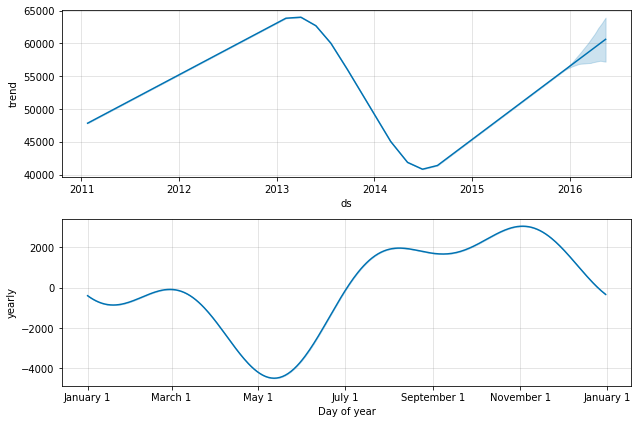

In [0]:
model_household.plot_components(forecast_pd_household)

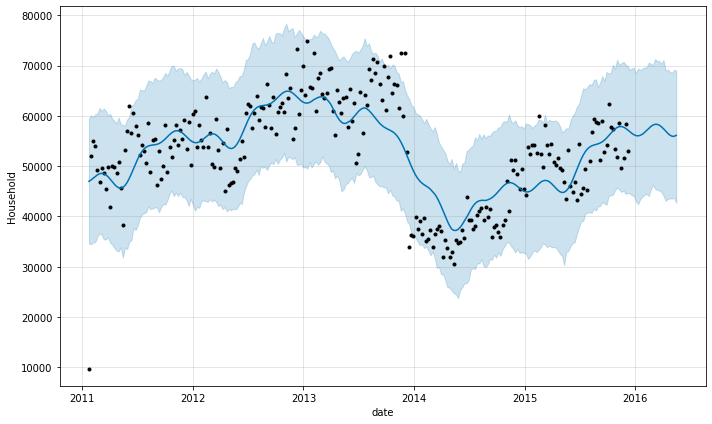

In [0]:
predict_fig= model_household.plot(forecast_pd_household, xlabel='date', ylabel='Household')
display(predict_fig)

In [0]:
display(testDF.select("week", "Household"))

week Household 2015-12-14T00:00:00.000+0000 61440 2015-12-21T00:00:00.000+0000 57675 2015-12-28T00:00:00.000+0000 53089 2016-01-04T00:00:00.000+0000 57527 2016-01-11T00:00:00.000+0000 53429 2016-01-18T00:00:00.000+0000 54236 2016-01-25T00:00:00.000+0000 61070 2016-02-01T00:00:00.000+0000 47135 2016-02-08T00:00:00.000+0000 53533 2016-02-15T00:00:00.000+0000 57593 2016-02-22T00:00:00.000+0000 58624 2016-02-29T00:00:00.000+0000 58105 2016-03-07T00:00:00.000+0000 58686 2016-03-14T00:00:00.000+0000 56499 2016-03-21T00:00:00.000+0000 61559 2016-03-28T00:00:00.000+0000 55951 2016-04-04T00:00:00.000+0000 52190 2016-04-11T00:00:00.000+0000 60667 2016-04-18T00:00:00.000+0000 51094 2016-04-25T00:00:00.000+0000 58532 2016-05-02T00:00:00.000+0000 60282 2016-05-09T00:00:00.000+0000 55279 2016-05-16T00:00:00.000+0000 54521